<a href="https://colab.research.google.com/github/clariceG/donate/blob/main/Finding_donors_for_a_charity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np

# Loading the Dataset
file_name= 'census.csv'
census=pd.read_csv(file_name)


In [125]:
#To View the Dataset
census.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [11]:
census

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
45218,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K
45219,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
45220,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [12]:
# Understanding the Dataset
print ("Rows     : " ,census.shape[0])
print ("Columns  : " ,census.shape[1])
print ("\nFeatures : \n" ,census.columns.tolist())
print ("\nUnique values :  \n",census.nunique())

Rows     :  45222
Columns  :  14

Features : 
 ['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

Unique values :  
 age                 74
workclass            7
education_level     16
education-num       16
marital-status       7
occupation          14
relationship         6
race                 5
sex                  2
capital-gain       121
capital-loss        97
hours-per-week      96
native-country      41
income               2
dtype: int64


In [13]:
# Finding Missing Values
# Dataset does not have missing values.
census.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
 census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


# **Exploratory Data Analysis**

In [15]:
# To understand the numerical data, its frequency, mean, standard deviation and much more.
census.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [16]:
# Use strip to remove white space characters before and after our data
census['income'] = census['income'].str.strip()
census.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [17]:
census['income']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
45217    <=50K
45218    <=50K
45219    <=50K
45220    <=50K
45221     >50K
Name: income, Length: 45222, dtype: object

In [18]:
# Total number of records
n_records = census.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = census.loc[census['income'] == '>50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = census[census['income'] == '<=50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50K: {}".format(n_greater_50k))
print("Individuals making at most $50K: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50K: {:.2f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50K: 11208
Individuals making at most $50K: 34014
Percentage of individuals making more than $50K: 24.78%


## Visualizations

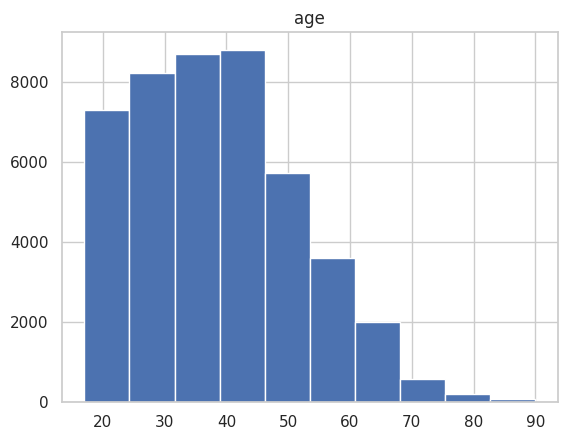

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid',color_codes=True)

# Age Histogram
census.hist(column='age')
plt.show()

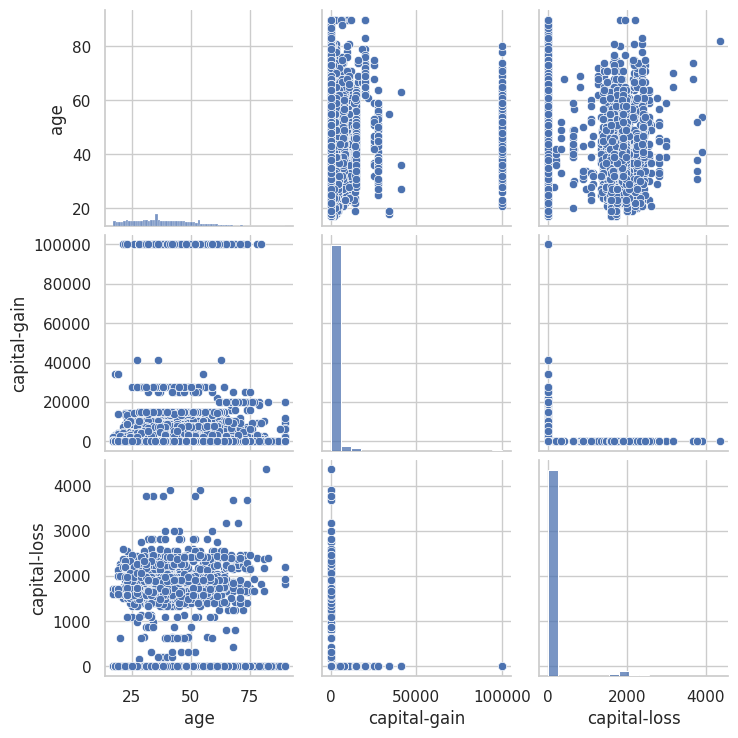

In [20]:
#Exploring the relationships and correlations between the 'age', 'capital-gain',
#and 'capital-loss' variables
fig = sns.pairplot(census[['age','capital-gain','capital-loss']])

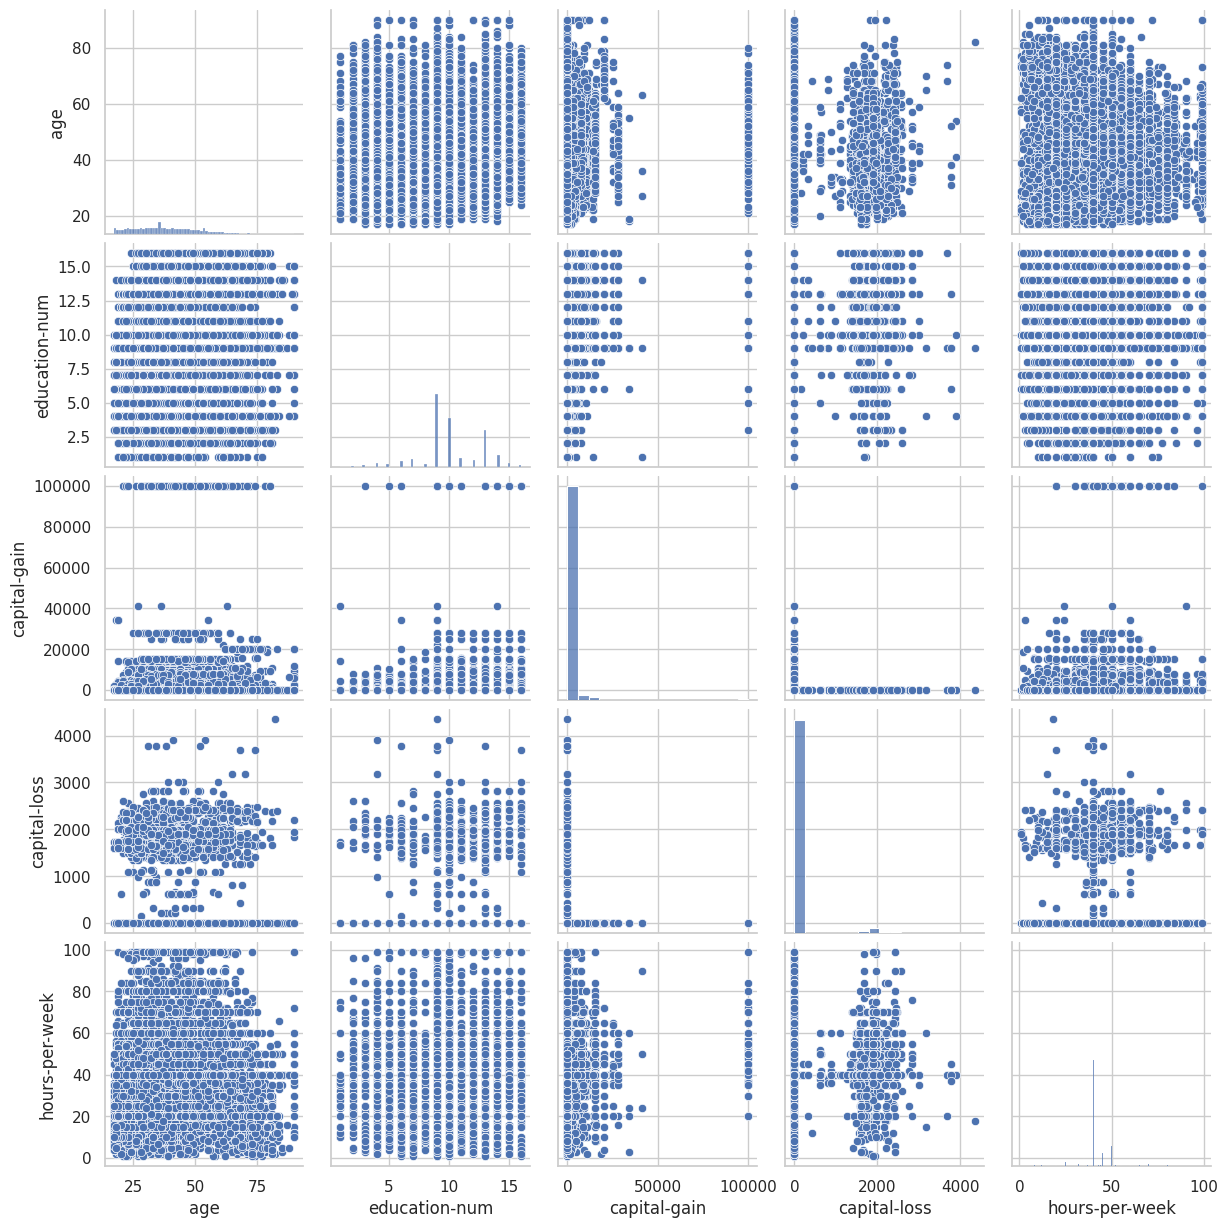

In [21]:
#Exploring the relationships and correlations between all the variables
sns.pairplot(census)

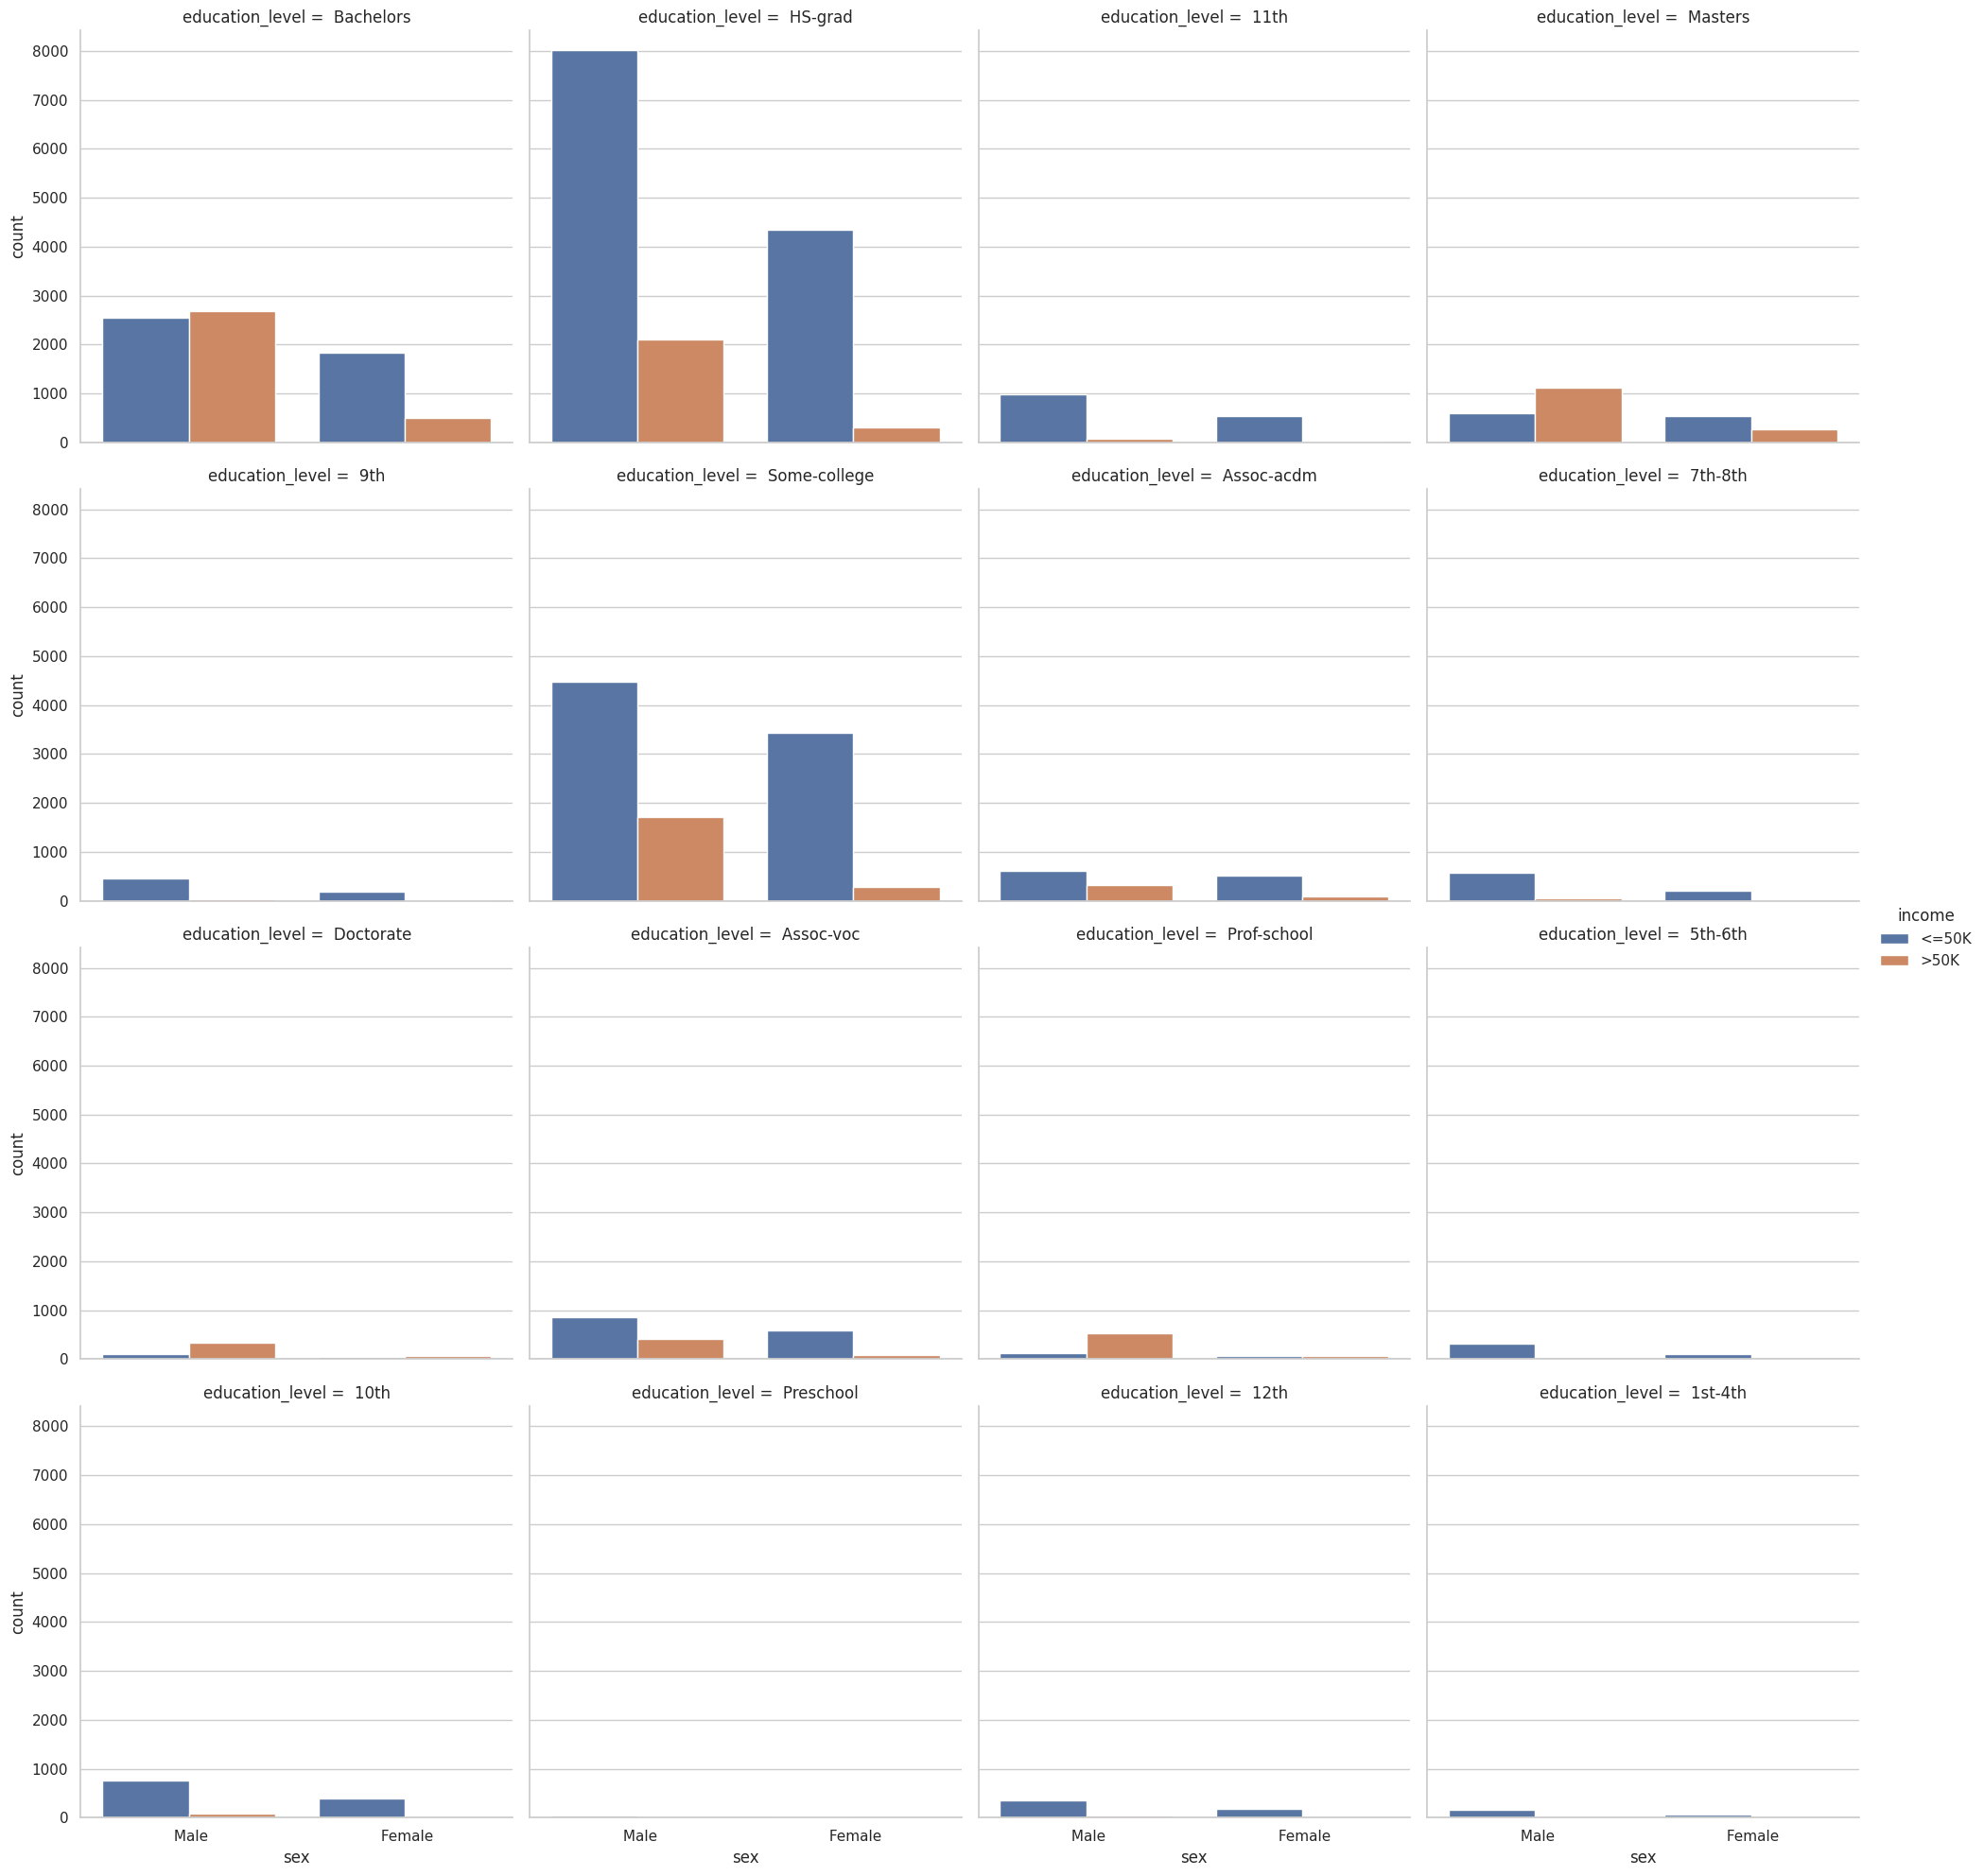

In [22]:
sns.catplot(x="sex", col="education_level", data=census, hue="income", kind="count", col_wrap=4)


In [23]:
# To see whether the data is duplicated
# It has 5982 duplicates
census[census.duplicated()].shape[0]

5982

In [24]:
# To remove the duplicated data
census.drop_duplicates(inplace=True)

In [ ]:
# To see whether there are any duplicates now
census[census.duplicated()].shape[0]

0

In [25]:
# To find size of dataset after droping duplicates
census.shape

(39240, 14)

In [26]:
# To drop the columns that will not be used
columns_to_drop = ['race', 'native-country', 'hours-per-week', 'education-num']
census.drop(columns_to_drop, axis=1, inplace=True)


In [27]:
# To find size of dataset after droping columns
census.shape

(39240, 10)

In [28]:
# The dataset does not have missing values but it has inappropriate values
# such as ? instead of data.

# To Find '?' in dataset column occupation
census[census['workclass']==' ?']

,age,workclass,education_level,marital-status,occupation,relationship,sex,capital-gain,capital-loss,income


In [29]:
# To Find '?' in dataset column occupation
census[census['occupation'] == " ?"]

,age,workclass,education_level,marital-status,occupation,relationship,sex,capital-gain,capital-loss,income


In [30]:
# Drop missing data
census = census[census['workclass'] != " ?"]
census = census[census['occupation'] != " ?"]

In [31]:
census.shape

(39240, 10)

# **Preprocessing**

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

# Scale numerical data
numerical=['age','capital-gain','capital-loss']

census[numerical]=scaler.fit_transform(census[numerical])

In [33]:
# To view Numerical Data
census[numerical]

,age,capital-gain,capital-loss
0,0.301370,0.021740,0.0
1,0.452055,0.000000,0.0
2,0.287671,0.000000,0.0
3,0.493151,0.000000,0.0
4,0.150685,0.000000,0.0
...,...,...,...
45216,0.424658,0.000000,0.0
45217,0.219178,0.000000,0.0
45218,0.301370,0.000000,0.0
45220,0.369863,0.054551,0.0


In [34]:
# To view entire data
census

,age,workclass,education_level,marital-status,occupation,relationship,sex,capital-gain,capital-loss,income
0,0.301370,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,0.021740,0.0,<=50K
1,0.452055,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0.000000,0.0,<=50K
2,0.287671,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0.000000,0.0,<=50K
3,0.493151,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.000000,0.0,<=50K
4,0.150685,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0.000000,0.0,<=50K
...,...,...,...,...,...,...,...,...,...,...
45216,0.424658,Local-gov,Masters,Divorced,Other-service,Not-in-family,Male,0.000000,0.0,<=50K
45217,0.219178,Private,Bachelors,Never-married,Prof-specialty,Own-child,Male,0.000000,0.0,<=50K
45218,0.301370,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,Female,0.000000,0.0,<=50K
45220,0.369863,Private,Bachelors,Divorced,Adm-clerical,Own-child,Male,0.054551,0.0,<=50K


In [35]:
# To Get raw income and drop it from our census and initialise as Y
y= census['income']
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

In [36]:
# To drop income our census
census.drop('income',axis=1,inplace=True)

In [37]:
# To view entire data
census

,age,workclass,education_level,marital-status,occupation,relationship,sex,capital-gain,capital-loss
0,0.301370,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,0.021740,0.0
1,0.452055,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Male,0.000000,0.0
2,0.287671,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,Male,0.000000,0.0
3,0.493151,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.000000,0.0
4,0.150685,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Female,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
45216,0.424658,Local-gov,Masters,Divorced,Other-service,Not-in-family,Male,0.000000,0.0
45217,0.219178,Private,Bachelors,Never-married,Prof-specialty,Own-child,Male,0.000000,0.0
45218,0.301370,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,Female,0.000000,0.0
45220,0.369863,Private,Bachelors,Divorced,Adm-clerical,Own-child,Male,0.054551,0.0


In [38]:
# To view income data
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
45216    <=50K
45217    <=50K
45218    <=50K
45220    <=50K
45221     >50K
Name: income, Length: 39240, dtype: object

In [39]:
# Encode the 'income' data to numerical values
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
y=y.apply(lambda x:0 if x=='<=50K' else 1) # To convert it to 0 or 1

In [40]:
# To view income data
y

0        0
1        0
2        0
3        0
4        0
        ..
45216    0
45217    0
45218    0
45220    0
45221    1
Name: income, Length: 39240, dtype: int64

In [41]:
# Changing categorical data to numbers since a model will use numbers to make predictions
# Features after one-hot encoding
X = pd.get_dummies(census)
X


,age,capital-gain,capital-loss,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
0,0.301370,0.021740,0.0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0.452055,0.000000,0.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.287671,0.000000,0.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.493151,0.000000,0.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.150685,0.000000,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,0.424658,0.000000,0.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45217,0.219178,0.000000,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
45218,0.301370,0.000000,0.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45220,0.369863,0.054551,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


# **Selection of Data Mining Algorithm**

In [42]:
# Spliting of the dataset
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [43]:
Y_train

14465    1
4390     1
32142    0
13592    0
14929    1
        ..
22826    0
36405    0
34361    0
23422    0
2765     1
Name: income, Length: 27468, dtype: int64

In [44]:
Y_test

9349     1
21996    1
12251    0
14957    1
764      0
        ..
33261    1
10339    1
23151    0
6196     0
7543     0
Name: income, Length: 11772, dtype: int64

In [45]:
X_test

,age,capital-gain,capital-loss,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
9349,0.328767,0.00000,0.000000,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
21996,0.547945,0.00000,0.000000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
12251,0.109589,0.00000,0.000000,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
14957,0.301370,0.00000,0.000000,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
764,0.123288,0.00000,0.000000,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33261,0.547945,0.00000,0.000000,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
10339,0.315068,0.00000,0.000000,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
23151,0.424658,0.00000,0.000000,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6196,0.150685,0.02174,0.000000,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [46]:
X_train

,age,capital-gain,capital-loss,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,...,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
14465,0.424658,0.00000,0.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4390,0.397260,0.00000,0.0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
32142,0.465753,0.00000,0.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
13592,0.123288,0.00000,0.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
14929,0.328767,0.00000,0.0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22826,0.643836,0.02635,0.0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
36405,0.342466,0.00000,0.0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
34361,0.424658,0.00000,0.0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
23422,0.232877,0.00000,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


## Decision Tree Classifier

In [47]:
# Import the DecisionTreeClassifier class from scikit-learn's tree module.
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the DecisionTreeClassifier class with specific hyperparameter settings.
dt=DecisionTreeClassifier()

# Train (fit) the Decision Tree classifier on the training data.
dt.fit(X_train,Y_train)

print(dt.score(X_train,Y_train))

0.9427697684578419


In [48]:
prediction=dt.predict(X_test)

In [49]:
list(prediction)

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,


In [50]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score

# To calculate the accuracy score
# It compares the results between Y_test and prediction.
accuracy_dt=accuracy_score(Y_test,prediction)*100

In [51]:
# Shaowcase accuracy score
accuracy_dt

80.21576622494054

In [52]:
# Trying to make a whole new prediction
dt.predict(X_test[2:3])

array([0])

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report= classification_report(Y_test,prediction)


confusion_matrix = confusion_matrix(Y_test,prediction)


In [60]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.86      0.88      0.87      8797\n           1       0.62      0.58      0.60      2975\n\n    accuracy                           0.80     11772\n   macro avg       0.74      0.73      0.73     11772\nweighted avg       0.80      0.80      0.80     11772\n'

In [61]:
confusion_matrix

array([[7732, 1065],
       [1264, 1711]])

### Hypertuning of Decision Tree

In [62]:
# GridSearchCV is a class in scikit-learn's model_selection module that facilitates
# hyperparameter tuning for machine learning models through an exhaustive search
# over a specified parameter grid.

#This process helps find the optimal combination of hyperparameters that yields
#the best performance for a given model and dataset.
from sklearn.model_selection import GridSearchCV

In [63]:
# Specifying the parameters
parameters={'min_samples_split':range(10,500,20),'max_depth':range(1,20,2),'criterion':['gini','entropy']}

clf_tree=DecisionTreeClassifier()

# Create an Instance:
clf=GridSearchCV(clf_tree,parameters,cv=5)

# Fitting the Grid Search
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20, 2),
                         'min_samples_split': range(10, 500, 20)})

In [64]:
# Best_estimator_ represents the best-performing model (estimator)
# found during the hyperparameter tuning process.
clf.best_estimator_

DecisionTreeClassifier(max_depth=19, min_samples_split=130)

In [65]:
# Make a prediction using X_test
clf_predict=clf.predict(X_test)

In [66]:
# To calculate the accuracy score
accuracy_score(clf_predict,Y_test)

0.8474345905538566

In [67]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report= classification_report(Y_test,clf_predict)


confusion_matrix = confusion_matrix(Y_test,clf_predict)

In [68]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.87      0.94      0.90      8797\n           1       0.76      0.58      0.66      2975\n\n    accuracy                           0.85     11772\n   macro avg       0.81      0.76      0.78     11772\nweighted avg       0.84      0.85      0.84     11772\n'

In [69]:
confusion_matrix

array([[8238,  559],
       [1237, 1738]])

### Decision Tree with Parameters

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=19, min_samples_split=130,criterion='gini') # The parameters from hypertuning
dt.fit(X_train,Y_train)


print(dt.score(X_train,Y_train))


0.86318625309451


In [71]:
prediction=dt.predict(X_test)

In [72]:
list(prediction)

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,


In [73]:
from sklearn.metrics import accuracy_score
accuracy_dt=accuracy_score(Y_test,prediction)*100

In [74]:
# Accuracy has increased from 80% to 84%
accuracy_dt

84.74345905538566

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report= classification_report(Y_test,prediction)


confusion_matrix = confusion_matrix(Y_test,prediction)

In [76]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.87      0.94      0.90      8797\n           1       0.76      0.58      0.66      2975\n\n    accuracy                           0.85     11772\n   macro avg       0.81      0.76      0.78     11772\nweighted avg       0.84      0.85      0.84     11772\n'

In [77]:
confusion_matrix

array([[8238,  559],
       [1237, 1738]])

## Logistics Regression

In [79]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression Model
log=LogisticRegression(max_iter=1000)

# Fit the Model
log.fit(X_train,Y_train)

# Print the Accuracy
print(log.score(X_train,Y_train))



0.8391582932867336


In [80]:
# To Display the Model
log

LogisticRegression(max_iter=1000)

In [81]:
# Make prediction
log_test=log.predict(X_test)

In [82]:
# Display Prediction Result
log_test

array([0, 1, 0, ..., 0, 0, 0])

In [83]:
# Calculate Accuracy Score
accuracy_dt=accuracy_score(log_test,Y_test)*100

In [84]:
accuracy_dt

83.81753312945973

In [85]:
log.predict(X_test[2:3])

array([0])

In [89]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report= classification_report(log_test,Y_test)


confusion_matrix = confusion_matrix(log_test,Y_test)

In [90]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.93      0.87      0.90      9406\n           1       0.58      0.73      0.64      2366\n\n    accuracy                           0.84     11772\n   macro avg       0.75      0.80      0.77     11772\nweighted avg       0.86      0.84      0.84     11772\n'

In [91]:
confusion_matrix

array([[8149, 1257],
       [ 648, 1718]])

### Hypertuning of Logistic Regression

In [92]:
# Create a Logistic Regression Model
model = LogisticRegression(max_iter=1000)

# Define Hyperparameter Grid
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01, 0.001]

parameters = dict(solver=solvers, penalty=penalty, C=c_values)

# Set up Grid Search
grid_search_log = GridSearchCV(estimator=model, param_grid=parameters, cv=5)

# Fit the Grid Search
grid_search_log.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                         'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [93]:
print("Best Hyperparameters:", grid_search_log.best_params_)
print("Best Estimator:", grid_search_log.best_estimator_)
print("Best Cross-validated Score:", grid_search_log.best_score_)


Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Estimator: LogisticRegression(C=100, max_iter=1000, solver='newton-cg')
Best Cross-validated Score: 0.8394131366584908


In [95]:
grid_log=grid_search_log.predict(X_test)

In [96]:
accuracy_score(grid_log,Y_test)

0.8394495412844036

### Logistic Regression with Parameters

In [97]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression Model
log=LogisticRegression(C=100, max_iter=1000, solver='newton-cg')

# Fit the Model
log.fit(X_train,Y_train)

# Print the Accuracy
print(log.score(X_train,Y_train))


0.8409057812727537


In [98]:
# To Display the Model
log

LogisticRegression(C=100, max_iter=1000, solver='newton-cg')

In [99]:
# Make prediction
log_test=log.predict(X_test)

In [100]:
# Calculate Accuracy Score
accuracy_dt=accuracy_score(log_test,Y_test)*100

In [101]:
# Accuracy increased from 83.8% to 83.9%
accuracy_dt

83.94495412844036

In [102]:
log.predict(X_test[2:3])

array([0])

In [103]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report= classification_report(log_test,Y_test)


confusion_matrix = confusion_matrix(log_test,Y_test)

In [104]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.93      0.87      0.90      9375\n           1       0.59      0.73      0.65      2397\n\n    accuracy                           0.84     11772\n   macro avg       0.76      0.80      0.77     11772\nweighted avg       0.86      0.84      0.85     11772\n'

In [105]:
confusion_matrix

array([[8141, 1234],
       [ 656, 1741]])

# **AdaBoost**

In [106]:
from sklearn.ensemble import AdaBoostClassifier

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost Classifier
ada_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train (fit) the classifier on the training data
ada_classifier.fit(X_train, Y_train)

# Make predictions on the test data
ada_prediction = ada_classifier.predict(X_test)

# Calculate accuracy score
accuracy_dt=accuracy_score(ada_prediction,Y_test)*100

accuracy_dt

85.76282704723072

In [107]:
list(ada_prediction)

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [108]:
ada_classifier.predict(X_test[2:3])

array([1])

In [109]:
ada_classifier

AdaBoostClassifier(random_state=42)

In [110]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report= classification_report(ada_prediction,Y_test)


confusion_matrix = confusion_matrix(ada_prediction,Y_test)

In [111]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.93      0.88      0.91      9296\n           1       0.64      0.76      0.69      2476\n\n    accuracy                           0.86     11772\n   macro avg       0.78      0.82      0.80     11772\nweighted avg       0.87      0.86      0.86     11772\n'

In [112]:
confusion_matrix

array([[8215, 1081],
       [ 595, 1881]])

### Hypertuning of AdaBoost

In [113]:
# Create a AdaBoost Model
ada_classifier = AdaBoostClassifier()

# Define Hyperparameter Grid
parameters = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Set up Grid Search
grid_search_ada = GridSearchCV(estimator=ada_classifier,  scoring='accuracy', param_grid=parameters, cv=5)

# Fit the Grid Search
grid_search_ada.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [114]:
print("Best Hyperparameters:", grid_search_ada.best_params_)
print("Best Estimator:", grid_search_ada.best_estimator_)
print("Best Cross-validated Score:", grid_search_ada.best_score_)

Best Hyperparameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}
Best Estimator: AdaBoostClassifier(n_estimators=200)
Best Cross-validated Score: 0.8578712450720781


In [115]:
prediction= grid_search_ada.predict(X_test)

In [116]:
accuracy_score(prediction,Y_test)

0.8656133197417601

### AdaBoost with Parameters

In [117]:
from sklearn.ensemble import AdaBoostClassifier

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an AdaBoost Classifier
ada_classifier = AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 1.0, n_estimators= 200, )

# Train (fit) the classifier on the training data
ada_classifier.fit(X_train, Y_train)

# Make predictions on the test data
ada_prediction = ada_classifier.predict(X_test)

# Calculate accuracy score
accuracy_dt=accuracy_score(ada_prediction,Y_test)*100

# Accuracy increases from 85 to 86
accuracy_dt

86.56133197417601

In [118]:
ada_classifier.predict(X_test[2:3])

array([1])

In [119]:
list(ada_prediction)

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,


In [120]:
ada_classifier

AdaBoostClassifier(n_estimators=200)

In [121]:
from sklearn.metrics import classification_report, confusion_matrix
classification_report= classification_report(ada_prediction,Y_test)


confusion_matrix = confusion_matrix(ada_prediction,Y_test)

In [122]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.93      0.89      0.91      9232\n           1       0.66      0.77      0.71      2540\n\n    accuracy                           0.87     11772\n   macro avg       0.80      0.83      0.81     11772\nweighted avg       0.88      0.87      0.87     11772\n'

In [123]:
confusion_matrix

array([[8230, 1002],
       [ 580, 1960]])

In [ ]:
importances = ada_classifier.feature_importances_
importances

array([0.08 , 0.395, 0.27 , 0.005, 0.   , 0.   , 0.005, 0.005, 0.005,
       0.   , 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,
       0.   , 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.   , 0.005,
       0.005, 0.005, 0.005, 0.   , 0.   , 0.005, 0.005, 0.   , 0.005,
       0.01 , 0.01 , 0.005, 0.005, 0.01 , 0.005, 0.01 , 0.005, 0.005,
       0.005, 0.005, 0.   , 0.005, 0.005, 0.01 , 0.   , 0.015, 0.01 ,
       0.01 ])